In [1]:
import pyreadstat
import pandas as pd
import numpy as np

# Reading Data

In [72]:
df, meta = pyreadstat.read_sav("m_d_806.sav")
columns = ["KIDCOUNT","YOBM","QTRBTHM","AGEQK","SEXK","SEX2ND","RACEM", "AGEM","AGED","TIMESMAR","MARITAL","QTRMAR","AGEMAR","YOBK","QTRBTHD","QTRBKID",
           "WEEKSM","HOURSM","INCOME1M","INCOME2M","FAMINC"]
df = df[columns]
print(df.head())
print(df.shape)

   KIDCOUNT  YOBM QTRBTHM  AGEQK SEXK SEX2ND RACEM AGEM AGED TIMESMAR  ...  \
0       2.0  44.0       1   38.0    1      0    01   36   39        1  ...   
1       1.0  42.0       2   34.0    1           01   37   39        2  ...   
2       2.0  52.0       2   36.0    0      1    01   27   35        1  ...   
3       2.0  54.0       3   23.0    0      1    01   25             1  ...   
4       2.0  49.0       4   44.0    1      0    01   30   28        1  ...   

  QTRMAR AGEMAR  YOBK  QTRBTHD QTRBKID WEEKSM HOURSM INCOME1M INCOME2M FAMINC  
0      1     25  70.0        2       3     16     30    02405    00000  33385  
1      4     14  71.0        1       3     32     35    05005    00000  16460  
2      1     17  71.0        1       1     00     00    00000    00000  16005  
3      3     18  74.0                2     52     38    08705    00000  10310  
4      3     18  69.0        1       1     30     40    09005    00000  20640  

[5 rows x 21 columns]
(927267, 21)


In [73]:
df.replace(" ", float("NaN"),inplace= True)
df.replace("NA", float("NaN"),inplace= True)
df = df.dropna()
print(df.shape)

(927267, 21)


In [74]:
df.AGEM  = pd.to_numeric(df.AGEM , errors='coerce', downcast='integer')
df=df.dropna()
print(df.shape)


(927267, 21)


In [75]:
df.AGED  = pd.to_numeric(df.AGED , errors='coerce', downcast='integer')
df=df.dropna()
print(df.shape)

(762843, 21)


In [76]:
df.TIMESMAR  = pd.to_numeric(df.TIMESMAR , errors='coerce', downcast='integer')
df=df.dropna()
#print(df["ASEX"]==0)
df = df[df["TIMESMAR"]==1]
print(df.shape,"TIMESMAR")


(672203, 21) TIMESMAR


In [77]:
df.MARITAL  = pd.to_numeric(df.MARITAL , errors='coerce', downcast='integer')
df=df.dropna()
#print(df["ASEX"]==0)
df = df[df["MARITAL"]==0]
print(df.shape,"MARITAL")

(672203, 21) MARITAL


In [78]:
df.QTRBTHM  = pd.to_numeric(df.QTRBTHM , errors='coerce', downcast='integer')
df=df.dropna()
print(df.shape,"QTRBTHM")

(672203, 21) QTRBTHM


In [79]:
df.QTRBKID  = pd.to_numeric(df.QTRBKID , errors='coerce', downcast='integer')
df=df.dropna()
print(df.shape,"QTRBKID")

(672203, 21) QTRBKID


In [80]:
df.YOBM  = pd.to_numeric(df.YOBM , errors='coerce', downcast='integer')
df=df.dropna()
print(df.shape,"YOBM")

(672203, 21) YOBM


In [81]:
df.YOBK  = pd.to_numeric(df.YOBK , errors='coerce', downcast='integer')
df=df.dropna()
print(df.shape,"YOBK")

(672203, 21) YOBK


In [82]:
df.AGEMAR  = pd.to_numeric(df.AGEMAR , errors='coerce', downcast='integer')
df=df.dropna()
print(df.shape,"AGEMAR")

(672203, 21) AGEMAR


In [83]:
df.QTRMAR  = pd.to_numeric(df.TIMESMAR , errors='coerce', downcast='integer')
df=df.dropna()
#print(df["ASEX"]==0)
df = df[df["QTRMAR"]>0]
print(df.shape,"QTRMAR")
df["yom"] = np.where(df["QTRBTHM"]<=df["QTRMAR"], df["YOBM"]+df["AGEMAR"],df["YOBM"]+df["AGEMAR"]+1)
df["dom_q"] = df["yom"]+(df["QTRMAR"]/4)
df["do1b_q"] = df["YOBK"] + (df["QTRBKID"]/4)
df["illegit"] = np.where(df["dom_q"] > df["do1b_q"], 1, 0)


(672203, 21) QTRMAR


In [84]:
df = df[df["illegit"]==0]
print(df.shape,"illegit")


(610653, 25) illegit


In [85]:
df.AGEQK  = pd.to_numeric(df.AGEQK , errors='coerce', downcast='integer')
df=df.dropna()
print(df.shape,"AGEQK")

df['agefstm'] = (((4*(80-df["YOBM"]))-df["QTRBTHM"] -1)-df["AGEQK"])/4
df = df[df["agefstm"]>15]
df.agefstm  = pd.to_numeric(df.agefstm , errors='coerce', downcast='integer')
df=df.dropna()
print(df.shape,"agefstm")



(610653, 25) AGEQK
(588442, 26) agefstm


In [86]:
df.QTRBTHD  = pd.to_numeric(df.QTRBTHD , errors='coerce', downcast='integer')
df=df.dropna()
print(df.shape,"QTRBTHD")

(588442, 26) QTRBTHD


In [87]:
df["YOBD"] = np.where(df["QTRBTHD"] == 0, 80-df["AGED"], 79-df["AGED"])
print(df.shape,"YOBD")

(588442, 27) YOBD


In [88]:
df['agefstd'] = (((4*(80-df["YOBD"]))-df["QTRBTHD"])-df["AGEQK"])/4
df = df[df["agefstd"]>15]
df.agefstd  = pd.to_numeric(df.agefstd , errors='coerce', downcast='integer')
df=df.dropna()
print(df.shape,"agefstd")

(588225, 28) agefstd


In [89]:
df['blackm'] = (df["RACEM"]==2)
df['hispm'] = (df["RACEM"]==12)
df['whitem'] = (df["RACEM"]==1)
df['othracem'] = 1 -df['blackm']-df['hispm']-df['whitem']

In [90]:
df["boy1st"] = (df["SEXK"]==0)
df["boy2nd"] = (df["SEX2ND"]==0)
print(df.shape)

(588225, 34)


In [91]:
df.WEEKSM  = pd.to_numeric(df.WEEKSM , errors='coerce', downcast='integer')
df=df.dropna()
print(df.shape,"WEEKSM")
df["workedm"] = (df["WEEKSM"]>0)

(588225, 34) WEEKSM


In [92]:
df.HOURSM  = pd.to_numeric(df.HOURSM , errors='coerce', downcast='integer')
df=df.dropna()
print(df.shape,"HOURSM")

(588225, 35) HOURSM


In [93]:
df.INCOME1M  = pd.to_numeric(df.INCOME1M , errors='coerce', downcast='integer')
df=df.dropna()
print(df.shape,"INCOME1M")

(588225, 35) INCOME1M


In [94]:
df.INCOME2M  = pd.to_numeric(df.INCOME2M , errors='coerce', downcast='integer')
df=df.dropna()
print(df.shape,"INCOME2M")

(588225, 35) INCOME2M


In [95]:
df["incomem"] = df["INCOME1M"] + np.where(df["INCOME2M"]>0,df["INCOME2M"],0)
df["incomem"] =  df["incomem"]*2.099173554
print(df.shape,"incomem")

(588225, 36) incomem


In [96]:
df.FAMINC  = pd.to_numeric(df.FAMINC , errors='coerce', downcast='integer')
df=df.dropna()
print(df.shape,"FAMINC")

(588225, 36) FAMINC


In [97]:
df["FAMINC"] =  df["FAMINC"]*2.099173554
df["FAMINC"]= np.where(df["FAMINC"]>1,df["FAMINC"],1)
df["FAMINC"] = np.log(df["FAMINC"])
print(df.shape,"FAMINC")

(588225, 36) FAMINC


In [98]:
df["morekids"] = (df["KIDCOUNT"]>2)

In [133]:
X_cols = ["morekids","AGEM","agefstm", "boy1st","boy2nd", "blackm", "hispm", "othracem"]
Y_cols = ["FAMINC"]
X = df[X_cols]
X = np.array(X)
print(X.shape)
Y = df[Y_cols]
Y = np.array(Y)
print(Y.shape)

(588225, 8)
(588225, 1)


# Splitting data into training and testing

In [134]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Training Decision tree

In [135]:
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
model = DecisionTreeRegressor()

t =cross_val_score(model,x_train, y_train, cv=10)
model.fit(x_train,y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

# Saving Decision tree in .png format

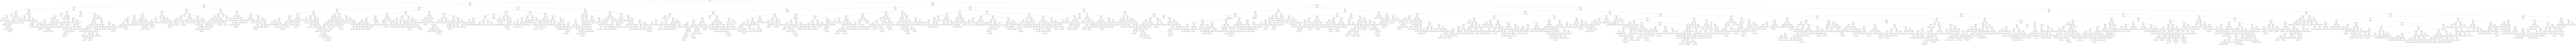

In [136]:
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
graph = Source( tree.export_graphviz(model, out_file=None, feature_names=X_cols))
png_bytes = graph.pipe(format='png')
with open('./married_women/log_family_income.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes)

# Training Linear Regression model

In [137]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# OLS estimate

In [138]:
print("OLS Estimate:",reg.coef_[0][0])

OLS Estimate: -0.10539463764765415
